<a href="https://colab.research.google.com/github/Rohan5076/AIMLOPS/blob/main/final_M5_NB_MiniProject_2_Keywords_Extraction_Transformer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project: Keywords Extraction using Transformer

## Learning Objectives

At the end of the experiment, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Medical Transcription dataset
* build transformer components - positional embedding, encoder, decoder, etc
* train a transformer model for keywords extraction
* create function to perform inference using trained transformer
* use the gradio library  to generate a customizable UI for displaying the extracted keywords

## Dataset description

The dataset used in this project is the **Medical transcription** dataset. It contains sample medical transcriptions for various medical specialties.

The data is in CSV format with below features:

- **description**

- **medical_specialty**

- **sample_name**

- **transcription**

- **keywords**

##  Grading = 10 Points

## Information

Medical transcriptions are textual records of patient-doctor interactions, medical procedures, clinical findings, and more. Extracting keywords from these transcriptions can provide valuable insights into a patient's health status, medical history, and treatment plans.

* Significance:

  - Data Summarization: Keyword extraction helps in summarizing lengthy medical transcriptions, making it easier for healthcare professionals to quickly understand the patient's medical history.

  - Search and Retrieval: Extracted keywords can be used to index medical records, facilitating faster search and retrieval of relevant documents.

  - Trend Analysis: By analyzing frequently occurring keywords, healthcare institutions can identify common ailments, treatment outcomes, and more.

* Applications:

  - Clinical Decision Support: Extracted keywords can be used to develop clinical decision support systems that provide real-time suggestions to healthcare professionals.
  - Patient Monitoring: By continuously analyzing the keywords from a patient's medical transcriptions, healthcare systems can monitor the patient's health and predict potential health risks.
  - Research: Medical researchers can use extracted keywords to identify trends, study disease outbreaks, and understand treatment efficacies.
  - Billing and Insurance: Keywords can help in automating the medical coding process, which is essential for billing and insurance claims.

### Problem Statement

Build a transformer model for performing keywords extraction on medical transcription dataset.

**Note:**
> For some steps such as how to create a positional embedding layer, transformer components - encoder and decoder blocks, etc you may need to refer to the ***M5 Assignment-5 on Transformer_Decoder*** covered in the 25 Aug Tutorial.

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import re
import random
import string
from string import digits
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#@title Download the dataset
!wget -q https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Medical_transcription_dataset.csv
!ls | grep ".csv"

Medical_transcription_dataset.csv


**Exercise 1: Read the Medical_transcription_dataset.csv dataset**

**Hint:** pd.read_csv()

In [ ]:
# Load the dataset
# YOUR CODE HERE
data = pd.read_csv('Medical_transcription_dataset.csv')
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."


### Pre-processing and EDA

**Exercise 2: Perform below operations on the dataset [0.5 Mark]**

- Remove unnecessary columns - 'Unnamed: 0'
- Handle missing values
- Remove rows from data where `keywords` is only single empty space ' $ $ '
- Remove duplicates from data considering `transcription` and `keywords` columns


- **Remove unnecessary columns - 'Unnamed: 0'**

In [ ]:
# YOUR CODE HERE
# Remove 'Unnamed: 0' column
data = data.drop(['Unnamed: 0'], axis=1)

# Handle missing values. Assuming you want to fill them with "None" for demonstration.
# To remove rows with any missing value, you would use data.dropna(inplace=True)
data = data.dropna()

# Remove rows where `keywords` is only single empty space ' $ $ '
data = data[data['keywords'] != ' ']

# Remove duplicates considering `transcription` and `keywords` columns
data.drop_duplicates(subset=['transcription', 'keywords'], keep='first', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3817 entries, 0 to 4995
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        3817 non-null   object
 1   medical_specialty  3817 non-null   object
 2   sample_name        3817 non-null   object
 3   transcription      3817 non-null   object
 4   keywords           3817 non-null   object
dtypes: object(5)
memory usage: 178.9+ KB


**Exercise 3: Display  all the categories of `medical_specialty` and their counts in the dataset [0.5 Mark]**



In [ ]:
# Displaying the distinct categories of medical specialty
unique_categories = data['medical_specialty'].unique()

print(unique_categories)

[' Allergy / Immunology' ' Bariatrics' ' Cardiovascular / Pulmonary'
 ' Dentistry' ' Urology' ' General Medicine' ' Surgery'
 ' Speech - Language' ' SOAP / Chart / Progress Notes' ' Sleep Medicine'
 ' Rheumatology' ' Radiology' ' Psychiatry / Psychology' ' Podiatry'
 ' Physical Medicine - Rehab' ' Pediatrics - Neonatal' ' Pain Management'
 ' Orthopedic' ' Ophthalmology' ' Office Notes' ' Obstetrics / Gynecology'
 ' Neurosurgery' ' Neurology' ' Nephrology' ' Letters'
 ' Lab Medicine - Pathology' ' IME-QME-Work Comp etc.'
 ' Hospice - Palliative Care' ' Hematology - Oncology' ' Gastroenterology'
 ' ENT - Otolaryngology' ' Endocrinology' ' Emergency Room Reports'
 ' Discharge Summary' ' Diets and Nutritions' ' Dermatology'
 ' Cosmetic / Plastic Surgery' ' Consult - History and Phy.'
 ' Chiropractic']


In [ ]:
# Total categories
total_categories = data['medical_specialty'].nunique()

print("Total categories:", total_categories)

Total categories: 39


In [ ]:
# Displaying the distinct categories of medical specialty and the number of records belonging to each category
category_counts = data['medical_specialty'].value_counts()

print(category_counts)

medical_specialty
 Surgery                          1008
 Orthopedic                        296
 Cardiovascular / Pulmonary        276
 Radiology                         248
 Consult - History and Phy.        220
 Gastroenterology                  193
 Neurology                         162
 SOAP / Chart / Progress Notes     140
 Urology                           139
 General Medicine                  137
 Obstetrics / Gynecology           128
 ENT - Otolaryngology               83
 Ophthalmology                      79
 Neurosurgery                       79
 Discharge Summary                  76
 Nephrology                         63
 Hematology - Oncology              60
 Pain Management                    58
 Podiatry                           42
 Office Notes                       40
 Pediatrics - Neonatal              38
 Emergency Room Reports             29
 Cosmetic / Plastic Surgery         25
 Dentistry                          24
 Dermatology                        24
 Letter

**Exercise 4: Create a pie plot depicting the percentage of `medical_specialty` distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

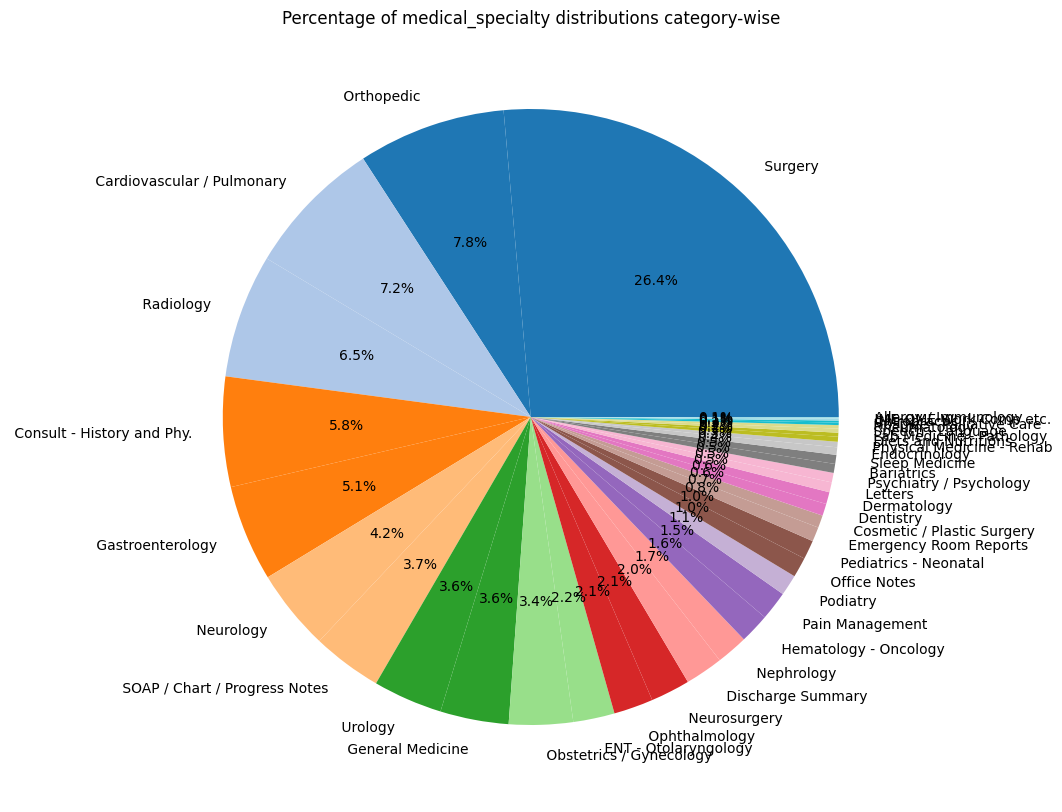

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage
percentage = data['medical_specialty'].value_counts(normalize=True)

# Create color palette
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(percentage.index)))

# Plot
plt.figure(figsize=(10,10))
plt.pie(percentage, labels = percentage.index, colors = colors, autopct='%1.1f%%')
plt.title('Percentage of medical_specialty distributions category-wise')
plt.show()

### Pre-process `transcription` and `keywords` text

**Exercise 5: Create functions to perform below tasks: [0.5 Mark]**

- Convert transcription and keywords text to lowercase
- Remove quotes from transcription and keywords text
- Remove all the special characters/punctuations
- Remove digits from transcription and keywords text
- Remove extra spaces

In [ ]:
import re

def preprocess_text(s):
    # Convert text to lowercase
    s = s.lower()

    # Remove quotes
    s = re.sub(r"\'", "", s)
    s = re.sub(r"\"", "", s)

    # Remove all the special characters/punctuation
    s = re.sub(r'\W', ' ', s)

    # Remove digits
    s = re.sub(r'\d', ' ', s)

    # Remove extra spaces
    s = re.sub(r'\s+', ' ', s).strip()

    return s

In [ ]:
data['transcription'] = data['transcription'].apply(preprocess_text)
data['keywords'] = data['keywords'].apply(preprocess_text)

**Exercise 6: Remove the stopwords from `transcription` text [0.5 Mark]**

- **Remove stopwords**

In [ ]:
# Function to remove the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return " ".join(filtered_text)

In [ ]:
# Remove stopwords from transcriptions
data['transcription'] = data['transcription'].apply(remove_stopwords)

**[OPTIONAL]** Visualize the distribution of word counts in both `transcription` and `keywords` text.

**Hint:**
- Get the text length of each sample
- pd.DataFrame().hist() OR sns.histplot()

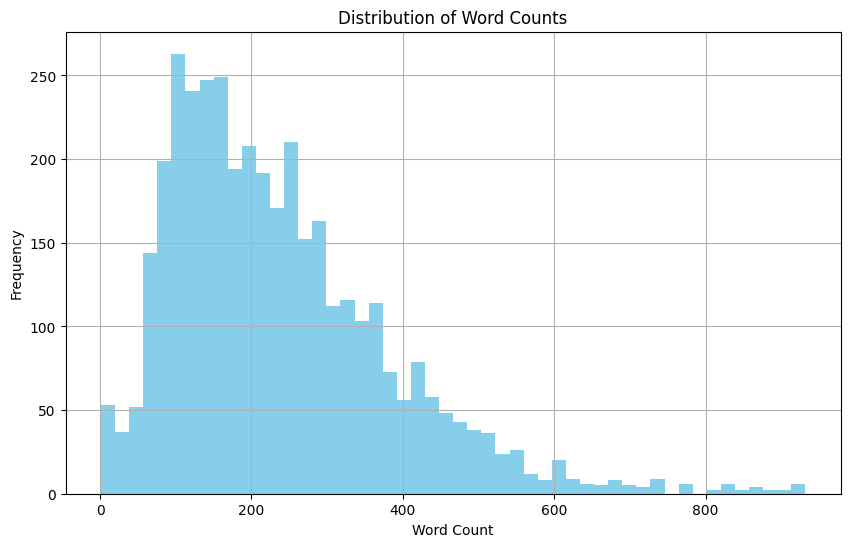

In [ ]:
# Visualize the distribution of word counts
# Calculate the word counts
data['word_counts'] = data['transcription'].apply(lambda x: len(str(x).split(" ")))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['word_counts'], bins=50, color='skyblue')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Select the maximum sequence length for both `transcription` and `keywords`

In [ ]:
# Fix the maximum length of the transcript
# Fix the maximum keywords length

max_len_transcript = 250
max_len_keywords = 30

**Exercise 7: Add `'start'` and `'end'` to `keywords` text at the beginning and end respectively [0.5 Mark]**

- 'start' will represent the beginning of output sequence
- 'end' will represent the end of output sequence

In [ ]:

# Adding 'start' and 'end' to keywords text
data['keywords'] = data['keywords'].apply(lambda x: 'start ' + x + ' end')

### Split data into training and testing set

- test_size=0.1
- random_state=0
- shuffle=True

In [ ]:
from sklearn.model_selection import train_test_split


X = data['transcription']
y = data['keywords']


# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True)


In [ ]:
data

,description,medical_specialty,sample_name,transcription,keywords,word_counts
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective year old white female presents complaint allergies used allergies lived seattle thinks worse past tried claritin zyrtec worked short time seemed lose effectiveness used allegra also use...,start allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic end,117
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stairs difficulty airline seats tying shoes used public seating lifting objects floor exercises three times week home cardio difficulty walking two blocks ...,start bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band los...,239
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc today pleasant gentleman years old pounds bmi overweight ten years since age highest pounds lowest pursuing surgical attempts weight loss feel good get healthy beg...,start bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric...,437
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mode left atrial enlargement left atrial diameter cm normal size right left ventricle normal lv systolic function left ventricular ejection fraction normal lv diastolic function pericardial effusi...,start cardiovascular pulmonary d m mode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic...,50
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,left ventricular cavity size wall thickness appear normal wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction near cavity obliteration seen also appears...,start cardiovascular pulmonary d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation p...,157
...,...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many years and made multiple attempts at nonsurgical weight loss without success.,Bariatrics,Discharge Summary - Gastric Bypass,admission diagnosis morbid obesity bmi discharge diagnosis morbid obesity bmi procedure laparoscopic gastric bypass service surgery consult anesthesia pain history present illness ms year old woma...,start bariatrics laparoscopic gastric bypass gastric bypass morbid obesity liquid diet bmi discharge end,184
4985,Patient presented to the Bariatric Surgery Service for consideration of laparoscopic Roux-en-Y gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,history present illness ms year old female presented bariatric surgery service consideration laparoscopic roux en gastric bypass patient states overweight approximately years tried multiple weight...,start bariatrics jenny craig medifast nutrisystem richard simmons slim fast tops weight watchers cabbage diet grape fruit diet roux en y laparoscopic roux en y gastric bypass weight loss modalitie...,416
4989,Evaluation for elective surgical weight loss via the Lap-Band as opposed to gastric bypass.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,past medical history negative stress test four five years ago gets short breath walking steps non insulin dependent diabetes eight years left knee arthritis history hemorrhoids past surgical histo...,start bariatrics elective surgical weight loss surgical weight loss weight loss lap band gastric

### Tokenization and padding

**Exercise 8: Convert the `transcription` and `keywords` text to sequence of integer values, and make them of uniform length [0.5 Mark]**

- Use two tokenizers to tokenize transcription and keywords separately
  
  **Hint:** [Tokenizer()](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer), `.fit_on_texts()`, `.texts_to_sequences()`

- Pad/Truncate both sequences as per their max sequence length specified in above exercises
    - use padding='post', truncating='post'
    - for transcription, (use maxlen= max_len_transcript)
    - for keywords, (use maxlen= max_len_keywords + 1)

  **Hint:** [`pad_sequences(`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)`sequences= , maxlen= , padding='post', truncating='post')`

- For long keywords sequences, the 'end' token might get truncated
    - replace the last token with the token index of 'end'

- save the vocab size for both sequences

In [ ]:
# Instantiate tokenizer for transcripts
x_tokenizer = Tokenizer()

# Fit on training data
x_tokenizer.fit_on_texts(list(X_train))

# Convert transcript sequences into integer sequences for both train and val set
X_train = x_tokenizer.texts_to_sequences(X_train)
X_test = x_tokenizer.texts_to_sequences(X_test)

# Add zero padding upto maximum length
#max_len_transcript = max([len(s.split()) for s in data['transcription']])

X_train = pad_sequences(X_train, maxlen=max_len_transcript, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len_transcript, padding='post', truncating='post')

#X_train = X_train.astype('float64')


# x vocab size
x_voc_size = len(x_tokenizer.word_index) +1
x_voc_size

17344

In [ ]:
print(X_train.shape)

(3435, 250)


In [ ]:
X_train

array([[ 921,  372, 2726, ...,    0,    0,    0],
       [3307,   86,    3, ...,  907, 1077,   60],
       [1074,  825,  100, ...,    0,    0,    0],
       ...,
       [  94, 1807,  719, ..., 6197,  578,  111],
       [  42,   86,  168, ...,    0,    0,    0],
       [ 244,  153,   81, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Instantiate tokenizer for keywords
y_tokenizer = Tokenizer()

# Fit on training data
y_tokenizer.fit_on_texts(list(y_train))

# Convert keywords sequences into integer sequences for train and val set
y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

# Add zero padding upto maximum length
#max_len_keywords = max([len(s.split()) for s in data['keywords']])

y_train = pad_sequences(y_train, maxlen=max_len_keywords+1, padding='post', truncating='post')
y_test = pad_sequences(y_test, maxlen=max_len_keywords+1, padding='post', truncating='post')

#y_train = y_train.astype('float64')


# y vocab size
y_voc_size = len(y_tokenizer.word_index) +1
y_voc_size

5812

In [ ]:
y_train.shape

(3435, 31)

- **For long keywords sequences, replace the last token with the token index of 'end'**

In [ ]:
print(y_tokenizer.word_index['end'])

1


In [ ]:
# Replace the last token with the token index of 'end' for long sequences

# Apply on Train keywords set
for seq in y_train:
  if seq[-1] != y_tokenizer.word_index['end'] :
    seq[-1] = y_tokenizer.word_index['end']

# Apply on Validation keywords set
for seq in y_test:
  if seq[-1] != y_tokenizer.word_index['end'] :
    seq[-1] = y_tokenizer.word_index['end']


### Positional Embedding

**Exercise 9: Create a class, `PositionalEmbedding` [1 Mark]**

- Use `mask_zero=True`, while defining token embeddings layer

- Make sure to make this layer a mask-generating layer by adding a method `compute_mask()`

In [ ]:
class PositionalEmbedding(layers.Layer):

    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                                                 mask_zero=True)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)


    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = tf.reshape(self.token_embeddings(inputs), (-1, length, self.output_dim))
        embedded_positions =tf.reshape(self.position_embeddings(positions), (-1, length, self.output_dim))
        return layers.Add()([embedded_tokens , embedded_positions])

    def compute_mask(self, inputs, mask=None):
        if mask is None:
          return None
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            'sequence_length': self.sequence_length,
            'input_dim': self.input_dim,
            'output_dim': self.output_dim,
        })
        return config


### Encoder Block

**Exercise 10: Create a class, `TransformerEncoder` [1 Mark]**

- While calling `attention` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [ ]:
import tensorflow as tf

class TransformerEncoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = tf.keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),
            layers.Dense(embed_dim),
            layers.Dropout(0.1),
        ])
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.add = layers.Add()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(inputs, inputs,inputs, attention_mask=mask)  # self attention
        proj_input = self.layernorm_1(self.add([inputs , attention_output]))
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(self.add([proj_input , proj_output]))

    def get_config(self):
        config = super(TransformerEncoder, self).get_config()
        config.update({
            'embed_dim': self.embed_dim,
            'dense_dim': self.dense_dim,
            'num_heads': self.num_heads,
        })
        return config


### Decoder Block

**Exercise 11: Create a class, `TransformerDecoder` [1 Mark]**

- Do not create any separate function to get causal attention mask, just pass `use_causal_mask = True` parameter while calling `attention_1` layer

- While calling `attention_2` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [ ]:
def create_causal_attention_mask(input_shape):
    mask = 1 - tf.linalg.band_part(tf.ones(input_shape), -1, 0)
    return mask

In [ ]:
class TransformerDecoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = tf.keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),
            layers.Dense(embed_dim),
            layers.Dropout(0.1),
        ])
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.add = layers.Add()

    def call(self, inputs, encoder_outputs):
        #input_shape = tf.shape(inputs)
        #attention_mask = create_causal_attention_mask((input_shape[0], input_shape[1], input_shape[1]))
        attention_output_1 = self.attention_1(query=inputs, value=inputs, key=inputs, use_causal_mask=True)
        out_1 = self.layernorm_1(self.add([inputs , attention_output_1]))
        attention_output_2 = self.attention_2(query=out_1, value=encoder_outputs, key=encoder_outputs)
        out_2 = self.layernorm_2(self.add([out_1 , attention_output_2]))
        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(self.add([out_2 , proj_output]))

    def get_config(self):
        config = super(TransformerDecoder, self).get_config()
        config.update({
            'embed_dim': self.embed_dim,
            'dense_dim': self.dense_dim,
            'num_heads': self.num_heads,
        })
        return config


### Build Transformer model

**Exercise 12: Create a transformer model with below points: [1 Mark]**

- Use the respective vocabulary size for PositionalEmbedding of encode and decoder inputs

- Add `Dropout(0.1)` layers after both encoder and decoder PositionalEmbedding layers

- Do not use `activation="softmax"` for the last dense classification layer (You will be required to create a custom loss, and metric in the next stage.)

- Add a stack of 4 encoder blocks and 4 decoder blocks to your transformer

In [ ]:
embed_dim = 256
dense_dim = 2048
num_heads = 8

# Encoder input, Embedding, and Positional Embedding
encoder_inputs = keras.Input(shape=(None,))
encoder_embed = PositionalEmbedding(sequence_length=max_len_transcript, input_dim=x_voc_size,
                                    output_dim=embed_dim)(encoder_inputs)
encoder_embed = layers.Dropout(0.1)(encoder_embed)

# Sequence of multiple Transformer blocks
for _ in range(4):
    encoder_embed = TransformerEncoder(embed_dim, dense_dim, num_heads)(encoder_embed)

# Decoder input, Embedding, and Positional Embedding
decoder_inputs = keras.Input(shape=(None,))
decoder_embed = PositionalEmbedding(sequence_length=max_len_keywords+1, input_dim=y_voc_size,
                                    output_dim=embed_dim)(decoder_inputs)
decoder_embed = layers.Dropout(0.1)(decoder_embed)

# Sequence of multiple Transformer blocks
for _ in range(4):
    decoder_embed = TransformerDecoder(embed_dim, dense_dim, num_heads)(decoder_embed, encoder_embed)

# Dense layer
decoder_outputs = layers.Dense(y_voc_size)(decoder_embed)

# Build model
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding      │ (None, None, 256)      │      4,504,064 │ input_layer[0][0]      │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, None, 256)      │              0 │ positional_embedding[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder       │ (None, None, 256)      │      3,155,456 │ dropout[0][0]          │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_1     │ (None, None, 256)      │      3,155,456 │ transformer_encoder[0… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_1    │ (None, None, 256)      │      1,495,808 │ input_layer_5[0][0]    │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_2     │ (None, None, 256)      │      3,155,456 │ transformer_encoder_1… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, None, 256)      │              0 │ positional_embedding_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder_3     │ (None, None, 256)      │      3,155,456 │ transformer_encoder_2… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder       │ (None, None, 256)      │      5,259,520 │ dropout_9[0][0],       │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_1     │ (None, None, 256)      │      5,259,520 │ transformer_decoder[0… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_2     │ (None, None, 256)      │      5,259,520 │ transformer_decoder_1… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder_3     │ (None, None, 256)      │      5,259,520 │ transformer_decoder_2… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder_3… │
├──────────────────────

 Total params: 41,153,460 (156.99 MB)

 Trainable params: 41,153,460 (156.99 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation and Training [1 Mark]

**Exercise 13: Set up the optimizer**

Refer [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_optimizer) for the following steps:

- Use the Adam optimizer with a custom learning rate scheduler

- Instantiate the Adam optimizer with custom learning rate

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# Instantiate the Adam optimizer with custom learning rate
learning_rate = CustomSchedule(embed_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate,beta_1=0.9, beta_2=0.98, epsilon=1e-9)

**Exercise 14: Set up the loss and metrics**

- Apply a padding mask while calculating the loss with cross-entropy loss function as demonstrated [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_loss_and_metrics).  

In [ ]:
def masked_loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def masked_accuracy(real, pred):
    real = tf.cast(real, tf.int32)
    pred = tf.cast(tf.argmax(pred, axis=2), tf.int32)
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.equal(real, pred)
    accuracies = tf.math.logical_and(mask, accuracies)
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)


**Exercise 15: Compile transformer model with custom optimizer, loss, and metric & perform training [0.5 Mark]**

- Use [*transcription sequences*, and *keywords sequences(shifted right)*] as input to transformer

- Train model using colab's GPU runtime with batch_size=32, and epochs=30. (It might take one minute per epoch with GPU)

**Hint:** Check if the training code is running without any errors with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model weights, and download into your system for later use.

In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Compile the model
transformer.compile(
    optimizer=optimizer,
    loss=masked_loss,
    metrics=[masked_accuracy]
)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Shift the target keyword sequences to the right
#y_train_input = pad_sequences(y_train[:, :-1], maxlen=max_len_keywords, padding='post')
#y_train_target = pad_sequences(y_train[:, 1:], maxlen=max_len_keywords, padding='post')

#y_test_input = pad_sequences(y_test[:, :-1], maxlen=max_len_keywords, padding='post')
#y_test_target = pad_sequences(y_test[:, 1:], maxlen=max_len_keywords, padding='post')

In [ ]:
X_train.shape

(3435, 250)

In [ ]:
X_train

array([[ 921,  372, 2726, ...,    0,    0,    0],
       [3307,   86,    3, ...,  907, 1077,   60],
       [1074,  825,  100, ...,    0,    0,    0],
       ...,
       [  94, 1807,  719, ..., 6197,  578,  111],
       [  42,   86,  168, ...,    0,    0,    0],
       [ 244,  153,   81, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Train the model


# Fit the model
history = transformer.fit(
    x=[X_train, y_train[:,:-1]],
    y=y_train[:,1:],  # Ensure y_train_target is in the correct format
    validation_data=([X_test, y_test[:,:-1]], y_test[:,1:]),  # Ensure y_test_target is in the correct format
    batch_size=16,
    epochs=15
)

Epoch 1/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 146s 379ms/step - loss: 8.4159 - masked_accuracy: 0.0523 - val_loss: 7.6345 - val_masked_accuracy: 0.0967
Epoch 2/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - loss: 7.3938 - masked_accuracy: 0.1056 - val_loss: 6.7119 - val_masked_accuracy: 0.1354
Epoch 3/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - loss: 6.4918 - masked_accuracy: 0.1500 - val_loss: 5.9292 - val_masked_accuracy: 0.1975
Epoch 4/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 46s 216ms/step - loss: 5.6522 - masked_accuracy: 0.2068 - val_loss: 5.1958 - val_masked_accuracy: 0.2561
Epoch 5/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 84s 223ms/step - loss: 4.8021 - masked_accuracy: 0.2777 - val_loss: 4.5301 - val_masked_accuracy: 0.3057
Epoch 6/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 82s 223ms/step - loss: 3.9870 - masked_accuracy: 0.3593 - val_loss: 3.9621 - val_masked_accuracy: 0.3560
Epoch 7/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 81s 219ms/step - loss: 3.2378 - masked_accuracy: 0.4462 - val_loss: 3.4179 - val_masked_a

### Save model weights

In [ ]:
!mkdir my_model_weights

In [ ]:
# Save model weights
# It will create a '.weights.h5' file which can be downloaded into your system from colab

transformer.save_weights('my_model_weights/my_weights.weights.h5')

In [ ]:
# OR
# Make a zip file, which also can be downloaded into your system from colab

!zip -r 'my_model_weights.zip' 'my_model_weights'

### Load model weights

Whenever you need to use this trained model weights:
* use the model architecture to create exact same model
* then load the trained weights directly using below code

In [ ]:
# To load model weights
transformer.load_weights('my_model_weights/my_weights.weights.h5')

## Run Inference

**Exercise 16: Create a function to extract keywords, given transcription text as input [1 Mark]**

- Encode the input sentence using the Transcription tokenizer. This is the encoder input
- Initialize decoder input with the 'start' token
- The decoder then outputs the predictions by looking at the encoder output and its own output (self-attention).
- Concatenate the predicted token to the decoder input and pass it to the decoder repeatedly
- Make decoder predict the next token based on the previous tokens it has predicted

In [ ]:
def extract_keywords(sentence, transformer=transformer):

    """ Takes an input sentence, and transformer. Returns extracted keywords. """

    # Convert input sentence into integer sequence (Note that tokenizer.texts_to_sequences() take list of text as input)
    ip_tokens = x_tokenizer.texts_to_sequences([sentence])

    # Add zero padding upto maximum length transcription
    ip_tok_seq =  pad_sequences(ip_tokens, maxlen=max_len_transcript, padding='post', truncating='post')

    # Create a decoder sequence with 'start' token index
    dec_tok_seq = np.array([y_tokenizer.word_index['start']])

    # Variable to store the output text string
    keyword_sentence = ''

    for i in range(max_len_keywords):

        # Get output logits from transformer
        pred = transformer([ip_tok_seq.reshape(1,-1), dec_tok_seq.reshape(1, -1)], training=False)
        pred = pred[:, -1:, :]

        # Select the index with max value from 'pred' to get the output token index
        max_ind = tf.argmax(pred, axis=-1)
        token = max_ind.numpy()[0][0]
        print(token)
        print(max_ind)
        # Convert output token to word
        word = y_tokenizer.index_word[token]

        # End the loop if word is 'end'
        # YOUR CODE HERE

        if word == 'end': break
        # Append 'token' to dec_tok_seq
        dec_tok_seq = np.append(dec_tok_seq, token)

        # Append 'word' to keyword sentence
        # YOUR CODE HERE
        keyword_sentence += ' ' + word

    return keyword_sentence.strip()


In [ ]:
# Predict keywords for a sample input

extract_keywords(data.transcription[100])


## Gradio Implementation [OPTIONAL]

Gradio is an open-source python library that allows us to quickly create easy-to-use, customizable UI components for our ML model, any API, or any arbitrary function in just a few lines of code. We can integrate the GUI directly into the Python notebook, or we can share the link with anyone.

In [ ]:
!pip -qq install gradio

In [ ]:
import gradio

In [ ]:
# Input from user
in_transcript = gradio.Textbox(lines=10, placeholder=None, value="transcription", label='Enter Transcription Text')

# Output prediction
out_keywords = gradio.Textbox(type="text", label='Extracted Keywords')


# Gradio interface to generate UI
iface = gradio.Interface(fn = extract_keywords,
                         inputs = [in_transcript],
                         outputs = [out_keywords],
                         title = "Keywords Extraction",
                         description = "Using transformer model, trained from scratch",
                         allow_flagging = 'never')

iface.launch(share = True)

Click on the link generated above to see UI.